# Quadratic Discriminant Analysis

Quadratic Discriminant Analysis (QDA) is a classifier with a quadratic decision boundary, generated by fitting class conditional densities to the data and using Bayes’ rule. It fits a Gaussian density to each class. QDA is an extension of linear discriminant analysis (LDA) and is quite similar to it. However, unlike LDA, QDA does not assume that each class shares the same covariance matrix. Instead, QDA assumes that each class has its own covariance matrix.

## Usage
QDA is used when the training set is large and it's unlikely that the classes share a common covariance matrix. In such situations, QDA tends to perform better since it is more flexible and can provide a better fit to the data. QDA is generally preferred to LDA in these situations.

## Assumptions
The fundamental assumption of QDA is that observations from each class are normally distributed. It also assumes that each class has its own covariance matrix. That is, it assumes that an observation from the kth class is of the form X ~ N (μk, Σk).

## Examples
1. **Iris Dataset**: QDA can be used to classify the species of iris flowers based on the length and width of their sepals and petals.
2. **Synthetic Data**: QDA can be used to classify synthetic data with a quadratic decision boundary.

Despite the assumption of each class having its own covariance matrix, QDA often performs well and is widely used because it's easy to understand, can be trained quickly, and is able to handle both continuous and discrete data. However, it can be prone to overfitting, especially when dealing with datasets with many features. Therefore, techniques such as regularization are often used to improve the model's performance.

# Квадратичный дискриминантный анализ

Квадратичный дискриминантный анализ (QDA) - это классификатор с квадратичной границей решения, созданный путем подгонки условных плотностей класса к данным и использования теоремы Байеса. Он подгоняет гауссову плотность к каждому классу. QDA является расширением линейного дискриминантного анализа (LDA) и очень похож на него. Однако, в отличие от LDA, QDA не предполагает, что каждый класс имеет общую ковариационную матрицу. Вместо этого QDA предполагает, что каждый класс имеет свою собственную ковариационную матрицу.

## Использование
QDA используется, когда обучающий набор данных большой, и маловероятно, что классы имеют общую ковариационную матрицу. В таких ситуациях QDA, как правило, работает лучше, поскольку он более гибкий и может обеспечить лучшую подгонку данных. QDA обычно предпочитается LDA в этих ситуациях.

## Предположения
Основное предположение QDA заключается в том, что наблюдения из каждого класса распределены нормально. Он также предполагает, что каждый класс имеет свою собственную ковариационную матрицу. То есть, предполагается, что наблюдение из k-го класса имеет форму X ~ N (μk, Σk).

## Примеры
1. **Набор данных Iris**: QDA можно использовать для классификации видов ирисов на основе длины и ширины их чашелистиков и лепестков.
2. **Синтетические данные**: QDA можно использовать для классификации синтетических данных с квадратичной границей решения.

Несмотря на предположение о том, что каждый класс имеет свою собственную ковариационную матрицу, QDA часто работает хорошо и широко используется, потому что его легко понять, можно быстро обучить, и он способен обрабатывать как непрерывные, так и дискретные данные. Однако он может быть склонен к переобучению, особенно при работе с наборами данных с большим количеством функций. Поэтому часто используются такие техники, как регуляризация, чтобы улучшить производительность модели.

100%|██████████| 9912422/9912422 [00:00<00:00, 76930655.80it/s]


Extracting /root/.pytorch/MNIST_data/MNIST/raw/train-images-idx3-ubyte.gz to /root/.pytorch/MNIST_data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 85487433.89it/s]


Extracting /root/.pytorch/MNIST_data/MNIST/raw/train-labels-idx1-ubyte.gz to /root/.pytorch/MNIST_data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 29462674.33it/s]


Extracting /root/.pytorch/MNIST_data/MNIST/raw/t10k-images-idx3-ubyte.gz to /root/.pytorch/MNIST_data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 13057250.70it/s]

Extracting /root/.pytorch/MNIST_data/MNIST/raw/t10k-labels-idx1-ubyte.gz to /root/.pytorch/MNIST_data/MNIST/raw




/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


Accuracy: 0.1478


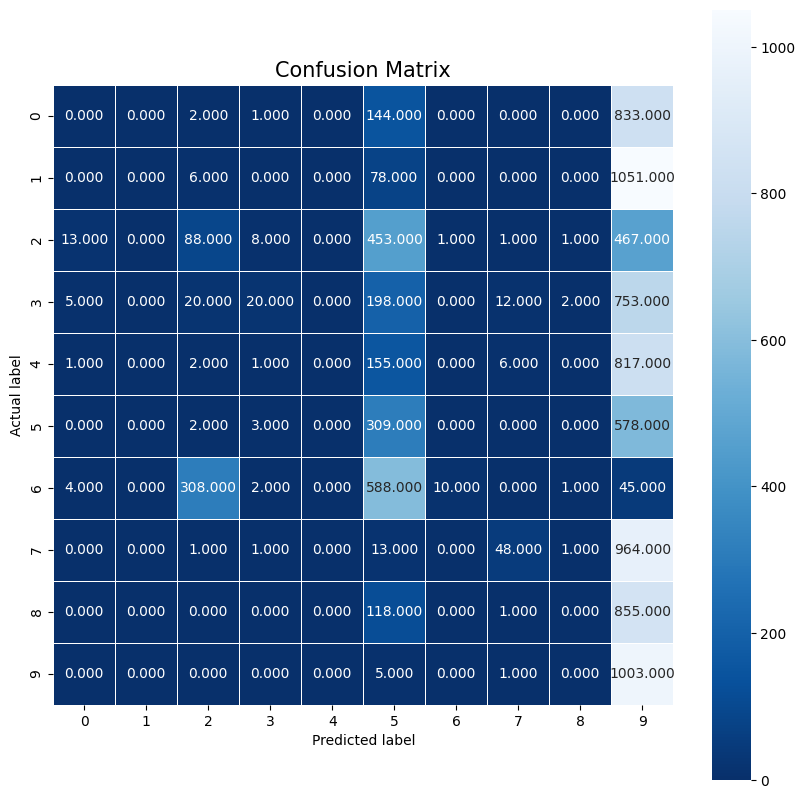

In [ ]:
import torch
from torchvision import datasets, transforms
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import accuracy_score, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

class QDAClassifier:
    """
    A class used to represent a Quadratic Discriminant Analysis (QDA) Classifier.

    ...

    Attributes
    ----------
    clf : sklearn.discriminant_analysis.QuadraticDiscriminantAnalysis
        The QDA classifier from scikit-learn.
    X_train : numpy.ndarray
        The training data.
    y_train : numpy.ndarray
        The training labels.
    X_test : numpy.ndarray
        The test data.
    y_test : numpy.ndarray
        The test labels.
    predictions : numpy.ndarray
        The predictions made by the classifier on the test data.

    Methods
    -------
    load_data():
        Loads the MNIST data.
    train():
        Trains the QDA classifier.
    predict():
        Makes predictions on the test data.
    accuracy():
        Returns the accuracy of the classifier.
    plot_confusion_matrix():
        Plots a confusion matrix of the classifier's predictions.
    """

    def __init__(self):
        """
        Constructs all the necessary attributes for the QDAClassifier object.
        """

        self.clf = QuadraticDiscriminantAnalysis()

    def load_data(self):
        """Loads the MNIST data."""

        # Define a transform to normalize the data
        transform = transforms.Compose([transforms.ToTensor(),
                                        transforms.Normalize((0.5,), (0.5,))])

        # Download and load the training data
        trainset = datasets.MNIST('~/.pytorch/MNIST_data/', download=True, train=True, transform=transform)
        testset = datasets.MNIST('~/.pytorch/MNIST_data/', download=True, train=False, transform=transform)

        # Use DataLoader to handle batching of the data
        trainloader = torch.utils.data.DataLoader(trainset, batch_size=len(trainset), shuffle=True)
        testloader = torch.utils.data.DataLoader(testset, batch_size=len(testset), shuffle=True)

        # Convert the data to numpy arrays
        traindata = next(iter(trainloader))
        testdata = next(iter(testloader))

        self.X_train = traindata[0].numpy().reshape(traindata[0].shape[0], -1)
        self.y_train = traindata[1].numpy()

        self.X_test = testdata[0].numpy().reshape(testdata[0].shape[0], -1)
        self.y_test = testdata[1].numpy()

    def train(self):
        """Trains the QDA classifier."""

        self.clf.fit(self.X_train, self.y_train)

    def predict(self):
        """Makes predictions on the test data."""

        self.predictions = self.clf.predict(self.X_test)

    def accuracy(self):
        """Returns the accuracy of the classifier."""

        return accuracy_score(self.y_test, self.predictions)

    def plot_confusion_matrix(self):
        """Plots a confusion matrix of the classifier's predictions."""

        cm = confusion_matrix(self.y_test, self.predictions)
        plt.figure(figsize=(10,10))
        sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
        plt.ylabel('Actual label');
        plt.xlabel('Predicted label');
        plt.title('Confusion Matrix', size = 15);
        plt.show()

# Example usage:
qda_classifier = QDAClassifier()
qda_classifier.load_data()
qda_classifier.train()
qda_classifier.predict()
print("Accuracy:", qda_classifier.accuracy())
qda_classifier.plot_confusion_matrix()


QDA assumes that each class has its own covariance matrix, unlike Linear Discriminant Analysis (LDA) which assumes that all classes share the same covariance matrix. This makes QDA more flexible than LDA and can lead to better performance on certain datasets. However, QDA is more prone to overfitting, especially when the number of features is large. So, it’s always a good idea to validate the model using cross-validation or a separate test set. Also, keep in mind that QDA can only be used for classification, not regression. If you want to do regression with a quadratic model, you might want to look into polynomial regression.

QDA предполагает, что каждый класс имеет свою собственную ковариационную матрицу, в отличие от линейного дискриминантного анализа (LDA), который предполагает, что все классы делят одну и ту же ковариационную матрицу. Это делает QDA более гибким, чем LDA, и может привести к лучшей производительности на определенных наборах данных. Однако QDA более склонен к переобучению, особенно когда количество признаков велико. Поэтому всегда хорошая идея проверять модель с помощью кросс-валидации или отдельного тестового набора. Также, стоит иметь в виду, что QDA может использоваться только для классификации, а не для регрессии. Если необходимо провести регрессию с квадратичной моделью, вы можете рассмотреть возможность полиномиальной регрессии.

Accuracy: 0.9666666666666667


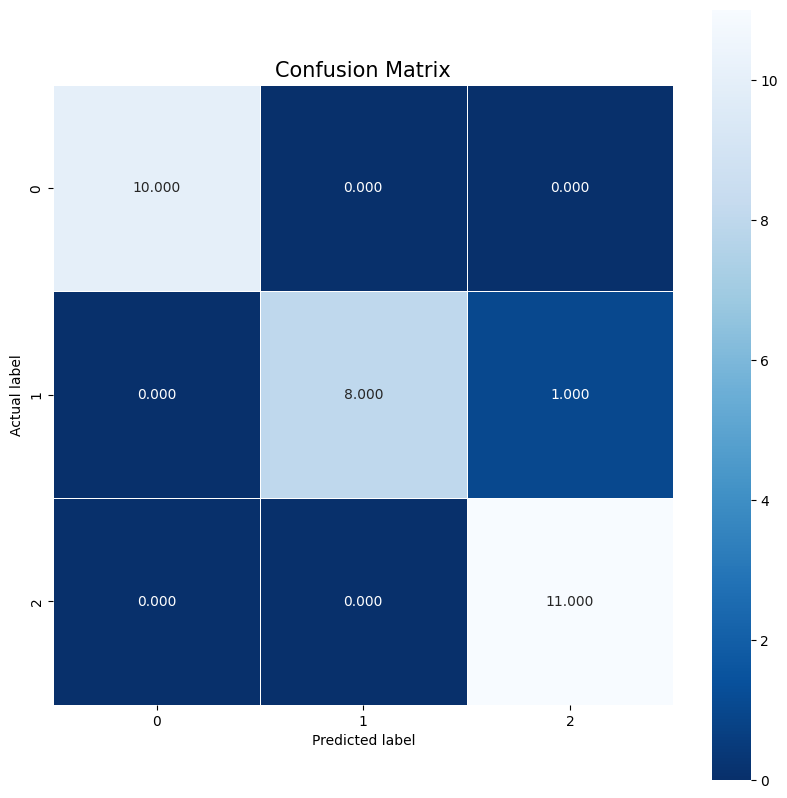

In [1]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

class QDAClassifier:
    """
    A class used to represent a Quadratic Discriminant Analysis (QDA) Classifier.

    ...

    Attributes
    ----------
    clf : sklearn.discriminant_analysis.QuadraticDiscriminantAnalysis
        The QDA classifier from scikit-learn.
    X_train : numpy.ndarray
        The training data.
    y_train : numpy.ndarray
        The training labels.
    X_test : numpy.ndarray
        The test data.
    y_test : numpy.ndarray
        The test labels.
    predictions : numpy.ndarray
        The predictions made by the classifier on the test data.

    Methods
    -------
    load_data():
        Loads the Iris data.
    train():
        Trains the QDA classifier.
    predict():
        Makes predictions on the test data.
    accuracy():
        Returns the accuracy of the classifier.
    plot_confusion_matrix():
        Plots a confusion matrix of the classifier's predictions.
    """

    def __init__(self):
        """
        Constructs all the necessary attributes for the QDAClassifier object.
        """

        self.clf = QuadraticDiscriminantAnalysis()

    def load_data(self):
        """Loads the Iris data."""

        iris = datasets.load_iris()
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=42)

    def train(self):
        """Trains the QDA classifier."""

        self.clf.fit(self.X_train, self.y_train)

    def predict(self):
        """Makes predictions on the test data."""

        self.predictions = self.clf.predict(self.X_test)

    def accuracy(self):
        """Returns the accuracy of the classifier."""

        return accuracy_score(self.y_test, self.predictions)

    def plot_confusion_matrix(self):
        """Plots a confusion matrix of the classifier's predictions."""

        cm = confusion_matrix(self.y_test, self.predictions)
        plt.figure(figsize=(10,10))
        sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
        plt.ylabel('Actual label');
        plt.xlabel('Predicted label');
        plt.title('Confusion Matrix', size = 15);
        plt.show()

# Example usage:
qda_classifier = QDAClassifier()
qda_classifier.load_data()
qda_classifier.train()
qda_classifier.predict()
print("Accuracy:", qda_classifier.accuracy())
qda_classifier.plot_confusion_matrix()
